In [1]:
#multi class perceptron
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#class 1 data
df=pd.read_csv("Class1_.csv")
df.head(5)

,X,Y
0,-2.2365,2.3224
1,2.4445,4.5807
2,1.8720,1.1315
3,5.1338,1.0316
4,2.1731,2.2868


In [3]:
#class 2 data
df0=pd.read_csv("Class2_.csv")
df0.head(5)

,X,Y
0,8.2960,-15.5630
1,6.1743,-14.7910
2,8.6760,-17.5040
3,5.5962,-9.6617
4,5.3870,-10.5100


In [4]:
#class1 adding 1
df['Z']=pd.Series(1,index=np.arange(500))
df.head(5)

,X,Y,Z
0,-2.2365,2.3224,1
1,2.4445,4.5807,1
2,1.8720,1.1315,1
3,5.1338,1.0316,1
4,2.1731,2.2868,1


In [5]:
#adding of 1 in class2
df0['Z']=pd.Series(1,index=np.arange(500))
df0.head(5)
df1=df0

In [6]:
#taking negative of data of class 2
df1=-df1
df1.head(5)

,X,Y,Z
0,-8.2960,15.5630,-1.0
1,-6.1743,14.7910,-1.0
2,-8.6760,17.5040,-1.0
3,-5.5962,9.6617,-1.0
4,-5.3870,10.5100,-1.0


In [7]:
#training data of class1
df2=df.sample(frac=.80)
df2.head(5)

,X,Y,Z
241,0.82025,1.66340,1
333,1.28120,-0.38259,1
48,0.58776,0.71247,1
292,0.50392,1.54410,1
466,3.48930,2.50330,1


In [8]:
#test data of class1
ind1=set(df.index.values)
ind2=set(df2.index.values)
ind3=ind1.symmetric_difference(ind2)
df4=df.loc[ind3]
df4.head(5)

,X,Y,Z
8,1.39790,-0.13413,1
9,-5.42570,0.87663,1
21,2.65830,0.70737,1
23,0.65642,1.88790,1
24,3.81370,2.44350,1


In [9]:
#training data of class 2
df3=df1.sample(frac=.80)
df3.head(5)

,X,Y,Z
483,-4.7132,11.822,-1.0
82,-6.8627,12.494,-1.0
286,-5.7660,11.902,-1.0
343,-5.1698,10.705,-1.0
197,-5.9720,12.600,-1.0


In [10]:
#test data of class2
ind1_=set(df0.index.values)
ind2_=set(df3.index.values)
ind3_=ind1_.symmetric_difference(ind2_)
df5=df0.loc[ind3_]
df5.head(5)


,X,Y,Z
4,5.3870,-10.510,1
15,5.9321,-11.877,1
18,5.3662,-10.402,1
29,5.2327,-11.633,1
37,5.6206,-14.428,1


In [11]:
#class 3 data
df6=pd.read_csv("Class3_.csv")
df6.head(5)

,X,Y
0,16.785,-4.1364
1,14.667,-5.8072
2,15.023,-1.7427
3,15.879,-4.7878
4,15.763,-2.9665


In [12]:
# adding of 1 in class 3
df6['Z']=pd.Series(1,index=np.arange(500))
df6.head(5)

,X,Y,Z
0,16.785,-4.1364,1
1,14.667,-5.8072,1
2,15.023,-1.7427,1
3,15.879,-4.7878,1
4,15.763,-2.9665,1


In [13]:
#training data class 3
import pandas as pd
df8=df6.sample(frac=.80)
df8.head(5)

,X,Y,Z
73,12.801,-9.9869,1
201,17.526,-2.1894,1
8,16.475,-5.8354,1
481,18.717,-3.5176,1
449,16.817,-4.7370,1


In [14]:
#test data class 3
ind1_=set(df6.index.values)
ind2_=set(df8.index.values)
ind3_=ind1_.symmetric_difference(ind2_)
df10=df6.loc[ind3_]
df10.head(5)

,X,Y,Z
4,15.763,-2.96650,1
5,17.151,-3.43270,1
7,14.538,-10.73300,1
15,13.584,-9.50110,1
17,16.177,-0.18895,1


In [15]:
# negative class 3
df7=-df8
df7.head(5)

,X,Y,Z
73,-12.801,9.9869,-1.0
201,-17.526,2.1894,-1.0
8,-16.475,5.8354,-1.0
481,-18.717,3.5176,-1.0
449,-16.817,4.7370,-1.0


In [16]:
# combining classs 1,2,3
D1={}
lst=['X','Y','Z']
for k in range(3):
    lst1=df2[df2.columns[k]].tolist()+df3[df3.columns[k]].tolist()+df7[df7.columns[k]].tolist()
    D1[lst[k]]=lst1
Ds1=pd.DataFrame(D1)   
Ds1.tail(5)

,X,Y,Z
1195,-18.270,-2.30210,-1.0
1196,-16.448,4.33720,-1.0
1197,-14.119,0.20751,-1.0
1198,-15.559,5.00440,-1.0
1199,-14.995,6.17440,-1.0


In [17]:
# weight vector for class 1,2,3
w1=np.array([3,4,-10])
n=len(Ds1[Ds1.columns[0]])
i=0
count1=0
while i<n:
    count1=count1+1
    s1=np.dot(w1,Ds1.loc[i])
    if s1<0:
        w1=w1+1*Ds1.loc[i]
        i=0
    else:
        i=i+1
print(w1)
count1

X   -12.51170
Y    21.76536
Z    87.00000
dtype: float64


29103

In [18]:
#combib=ning class 2 and 3
D2={}
lst=['X','Y','Z']
df9=-df3
for k in range(3):
    lst1=df9[df9.columns[k]].tolist()+df7[df7.columns[k]].tolist()
    D2[lst[k]]=lst1
Ds2=pd.DataFrame(D2)   
Ds2.head(10)

,X,Y,Z
0,4.7132,-11.822,1.0
1,6.8627,-12.494,1.0
2,5.7660,-11.902,1.0
3,5.1698,-10.705,1.0
4,5.9720,-12.600,1.0
5,3.1852,-11.926,1.0
6,8.0614,-15.200,1.0
7,5.2458,-10.282,1.0
8,7.4220,-14.034,1.0
9,7.2765,-15.688,1.0


In [19]:
#weigt vector 2 and 3
w2=np.array([3,-8,5])
n=len(Ds2[Ds2.columns[0]])
i=0
count2=0
while i<n:
    count2=count2+1
    s2=np.dot(w2,Ds2.loc[i])
    if s2<0:
        w2=w2+2*Ds2.loc[i]
        i=0
    else:
        i=i+1
print(w2)
count2

X   -100.5194
Y    -77.8192
Z     11.0000
dtype: float64


6390

In [20]:
ls1=[]
ls1.append(df5[df5.columns[0]].min(axis=0))
ls1.append(df4[df4.columns[0]].min(axis=0))
ls1.append(df10[df10.columns[0]].min(axis=0))
ls2=[]
ls2.append(df5[df5.columns[0]].max(axis=0))
ls2.append(df4[df4.columns[0]].max(axis=0))
ls2.append(df10[df10.columns[0]].min(axis=0))
ls3=[]
ls4=[]
ls3.append(df5[df5.columns[1]].max(axis=0))
ls3.append(df4[df4.columns[1]].max(axis=0))
ls4.append(df5[df5.columns[1]].min(axis=0))
ls4.append(df4[df4.columns[1]].min(axis=0))
ls3.append(df10[df10.columns[1]].max(axis=0))
ls4.append(df10[df10.columns[1]].min(axis=0))
ls3

[-5.4926, 5.2994, 6.0829]

In [21]:
#findin of min and max value to define range for plotting
ls7=[]
ls7.append(df5[df5.columns[0]].min(axis=0))
ls7.append(df10[df10.columns[0]].min(axis=0))
ls8=[]
ls8.append(df5[df5.columns[0]].max(axis=0))
ls8.append(df10[df10.columns[0]].max(axis=0))


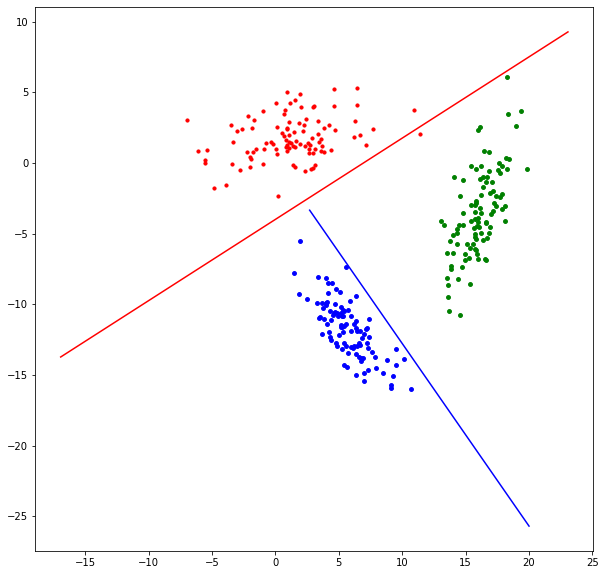

In [22]:
import matplotlib.pyplot as plt
import numpy as np
v1=min(ls1)-10
v2=max(ls2)+10
x1=np.linspace(v1,v2,150)
#----------------------------------------------------
slop1 = -(w1[0]/w1[1])  
intercept1 = -w1[2]/w1[1]
y1=[]
for i in x1:
    s1=slop1*i+intercept1
    y1.append(s1)
#------------------------------------------------
slop2 = -(w2[0]/w2[1])  
intercept2 = -w2[2]/w2[1]
v3=2.7
v4=20
x2=np.linspace(v3,v4,150)
y2=[]
for k in x2:
    s2=slop2*k+intercept2
    y2.append(s2)
#------------------------------------------------------
plt.figure(figsize=(10,10))
plt.scatter(df4[df4.columns[0]],df4[df4.columns[1]],s=10,c='r')
plt.scatter(df5[df5.columns[0]],df5[df5.columns[1]],s=15,c='b')
plt.scatter(df10[df10.columns[0]],df10[df10.columns[1]],s=15,c='g')    
plt.plot(x1,y1,color='r')
plt.plot(x2,y2,color='b')
plt.show()